In [71]:
# Python built-in library imports
import os
from collections import OrderedDict

# pip installed library imports
import h5py
import matplotlib.cm as cm
import matplotlib.colors
import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import pandas as pd
import scipy as sci

import mpl_toolkits
from mpl_toolkits.basemap import Basemap

In [72]:
filepath = '/Users/mlimb/sio/methane/gosat/data/SWIRL3CH4/aliso/{}'
filepath2 = '/Users/mlimb/sio/methane/gosat/data/SWIRL3CH4/aliso/FEB/{}'
filepath10 = '/Users/mlimb/sio/methane/gosat/data/SWIRL3CH4/aliso/OCT/{}'

In [73]:
# oct_15 = '15-OCT-GOSATTFTS2015100120151031_03C02SV0260.h5'
# oct_15[0:6] # outputs: '15-OCT' use the first 5 letters of the filename as a figure title

In [74]:
# check the contents of the directory
# os.listdir('./data/SWIRL3CH4/aliso/')
# os.listdir('./data/SWIRL3CH4/aliso/OCT')

## Figure titles for the histograms and maps

In [75]:
title = 'Monthly Averaged Methane Column Mixing Ratio (20{})'
hist_title = 'Monthly Averaged Methane Column Mixing Ratio (20{})'
map_title = 'Monthly Averaged Methane Column Mixing Ratio (20{})'

## List the filenames

In [76]:
# Aliso Canyon Duration
oct_15 = '15-OCT-GOSATTFTS2015100120151031_03C02SV0260.h5' # leak identified
nov_15 = '15-NOV-GOSATTFTS2015110120151130_03C02SV0260.h5'
dec_15 = '15-DEC-GOSATTFTS2015120120151231_03C02SV0260.h5'
jan_16 = '16-JAN-GOSATTFTS2016010120160131_03C02SV0260.h5'
feb_16 = '16-FEB-GOSATTFTS2016020120160229_03C02SV0260.h5' # leak plugged
mar_16 = '16-MARCH-GOSATTFTS2016030120160331_03C02SV0260.h5'

# February data
feb_13 = '13-FEB-GOSATTFTS2013020120130228_03C02SV0221.h5'
feb_14 = '14-FEB-GOSATTFTS2014020120140228_03C02SV0221.h5'
feb_15 = '15-FEB-GOSATTFTS2015020120150228_03C02SV0240.h5'
# feb_16 included in aliso canyon
# feb_16 = '16-FEB-GOSATTFTS2016020120160229_03C02SV0260.h5'
feb_17 = '17-FEB-GOSATTFTS2017020120170228_03C02SV0260.h5'

# October data
oct_09='09-OCT-GOSATTFTS2009100120091031_03C02SV0221.h5'
oct_10='10-OCT-GOSATTFTS2010100120101031_03C02SV0221.h5'
oct_11= '11-OCT-GOSATTFTS2011100120111031_03C02SV0221.h5'
oct_12= '12-OCT-GOSATTFTS2012100120121031_03C02SV0221.h5'
oct_13= '13-OCT-GOSATTFTS2013100120131031_03C02SV0221.h5'
oct_14= '14-OCT-GOSATTFTS2014100120141031_03C02SV0231.h5'
# oct_15 included in aliso canyon
# oct_15= '15-OCT-GOSATTFTS2015100120151031_03C02SV0260.h5'
oct_16= '16-OCT-GOSATTFTS2016100120161031_03C02SV0260.h5'

### Create a list of filenames for: October, February and Aliso Canyon Months

In [77]:
ls_octs = [oct_09, oct_10, oct_11, oct_12, oct_13, oct_14, oct_15, oct_16]
ls_febs = [feb_13, feb_14, feb_15, feb_16, feb_17]
ls_months = [oct_15, nov_15, dec_15, jan_16, feb_16, mar_16]

### Create ordred dictionary that maps month-year string to filename

ex. '15-OCT' -> '15-OCT-GOSATTFTS2015100120151031_03C02SV0260.h5'

In [78]:
ls_date_and_files = OrderedDict()
oct_data = OrderedDict()
feb_data = OrderedDict()

for name in ls_months:
    #print name
    ls_date_and_files[name[0:6]] = name

for name in ls_octs:
    #print name
    oct_data[name[0:6]] = name
    
for name in ls_febs:
    feb_data[name[0:6]] = name

In [79]:
# check outpus/ 
# print ls_date_and_files
# print ls_octs

### Read and store hdf5 files

hdf5 files can be read by netCDF4 module. I tried several other ways (Ex. h5py) of reading hdf5 files, but settled on this one.

In [80]:
# test test
# nc = netCDF4.Dataset(filepath.format(jan_16))

# initialize empty OrderedDicts
ncs = OrderedDict()
ncs_feb = OrderedDict()
ncs_oct = OrderedDict()

for title, filename in ls_date_and_files.items():
    # print title
    # print filepath.format(filename)
    ncs[title] = netCDF4.Dataset(filepath.format(filename))

for title, filename in feb_data.items():
    ncs_feb[title] = netCDF4.Dataset(filepath2.format(filename))

for title, filename in oct_data.items():
    ncs_oct[title] = netCDF4.Dataset(filepath10.format(filename))

### NOTE: -9999.0 is invalid value and need to be masked

In [81]:
aa =ncs_oct['09-OCT']['Data']['mixingRatio']['XCH4'].invalidValue
aa

-9999.0

### Some helpful functions for retrieving data from hdf5 files

In [82]:
def get_ch4_data(nc):
    """Return the monthly methane average column mixing ratio values as 2D numpy array"""
    ch4 = nc.groups['Data']['mixingRatio']['XCH4']
    return np.array(ch4)

def get_ch4_masked_data(nc):
    """Return the *masked* monthly methane average column mixing ratio values
    
    *This is what should be used to generate figures as invalid values will be masked
    and automatically NOT Plotted
    """
    ch4 = nc.groups['Data']['mixingRatio']['XCH4']
    masked_data = np.ma.masked_equal(ch4, value=ch4.invalidValue)
#   print masked_data
    return masked_data

def get_ch4_mask(nc):
    """Return the mask array as 2D numpy array
    
    * Used get_ch4_masked_data. Easier to use numpy module to mask then to do it manually!
    """
    mask = nc.groups['Data']['maskInformation']['XCH4Mask']
    return np.array(mask)

### Create an ordered dictionary to store data!!

In [83]:
# init emtpy ordered dicts
data = OrderedDict()
data2 = OrderedDict()
data10= OrderedDict()


def make_data_dict(_ncs, _data=OrderedDict()):  
    """Populate the given OrderedDict with given hdf5 data
    Note: If no OrderedDict is given, create an empty one
    
    Result:
        OrderedDict will have these keys: data, masked_data, mask and flat_data
        
    * Currently, *masked_data* is used to generate all the maps
    * 'data' and 'mask' are NOT used. consider removing!
    * flat_data is 1D version of 2D arrays and is used to generate histograms
    """
    for key, _nc in _ncs.items():
        _data[key] = {}
        _data[key]['data'] = get_ch4_data(_nc) # not used 
        _data[key]['masked_data'] = get_ch4_masked_data(_nc) # used to make maps
        _data[key]['mask'] = get_ch4_mask(_nc) # not used
        _data[key]['flat_data'] = _data[key]['data'].flatten() # used to make histograms
    #return _data # commenting this line prevents output

### Call *make_data_dict* to populate the empty ordered dictionaries with data

In [84]:
# # test test
make_data_dict(ncs, data)

In [85]:
make_data_dict(ncs_feb, data2)
make_data_dict(ncs_oct, data10)

In [86]:
# some checking of dictionary keys
#ncs.keys()
#data.keys()

# Function to plot histogram

In [87]:
def plot_hist(_plt, _data, _title, x_range, y_max=600, color_type='darkred'):
    """
    _plt [matplotlib.pyplot]
    _data [2D Numpy array] input data (already flattened)
    """
    _plt.figure(figsize=(6,4))

    # x_range is a tuple of min and max value range
    # this is done to ignore invalid value -9999.0
    # NOTE: I haven't tried generating historgram since masking
    # Might no longer need to manually define x_range to ignore invalid value
    min_val = x_range[0]
    max_val = x_range[1]
   
    _plt.hist(_data, 100, [min_val, max_val], color=color_type, rwidth=0.9)
    #_plt.hist(_data, 100, color=color_type, rwidth=0.9)

    # set x range
    _plt.xlim([min_val, max_val])
    _plt.ylim([0, y_max])
    
    # round the maximum data value to 3 sig figs to display in the figure
    # otherwise it's a long float
    hist_max = round(np.amax(_data), 3)
        
    # set labels, legend and title
    _plt.xlabel('Methane Column Mixing Ratio [{},{}]'.format(min_val, max_val))
    _plt.ylabel('Count')
    _plt.legend(('Max (ppm): {0:.2f}'.format(hist_max), 'why '), loc='upper left')
    _plt.title(hist_title.format(_title))
    
    # lets create nice figs
    _plt.savefig('{}-hist-XCH4.png'.format(_title))
    
    # and display them here
    _plt.show() # commenting out now since they will be saved # uncomment to show on GitHub
    
def get_range(_data):
    """Return the range of data using numpy amin and amax functions"""
    return (np.amin(_data), np.amax(_data))

### Generate histograms for Aliso Canyon Months (*data*)

These are green (perhaps not best color choice given that Aliso Canyon Gas Leak was a public disaster). But these are for exploratory use only.

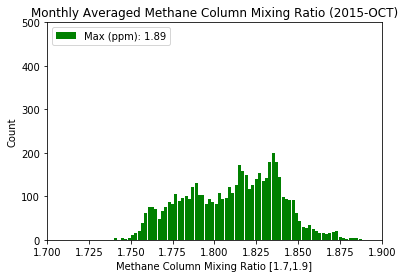

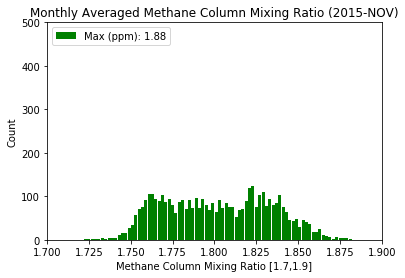

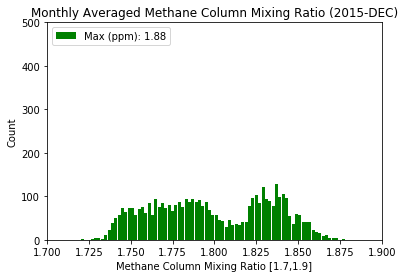

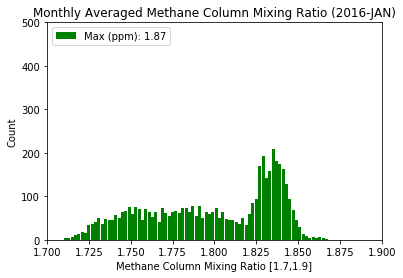

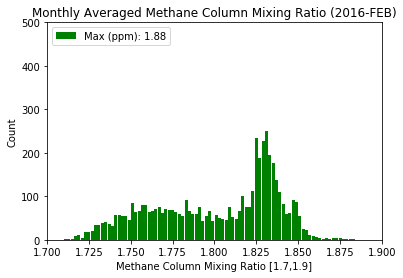

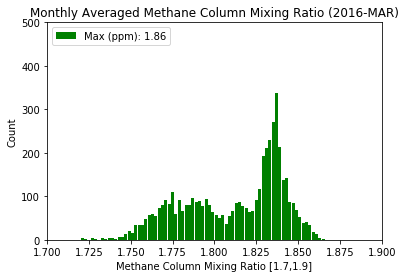

In [88]:
for title, datum in data.iteritems():
    #print title
    #print data[title].keys()
    plot_hist(plt, data[title]['flat_data'], title, x_range=(1.70, 1.9), y_max=500, color_type='green')

### Generate histograms for October months (2009-2016) (*data10*)

These are purple. Using different x_range compared to aliso canyon

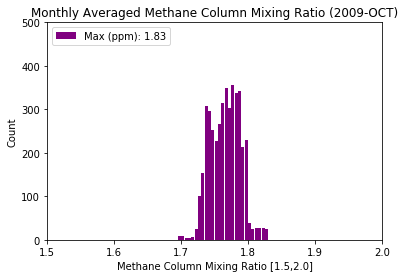

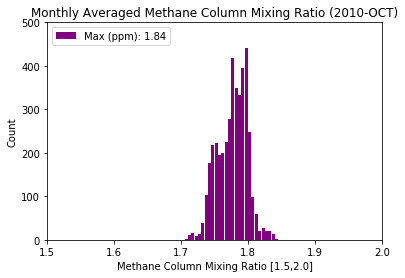

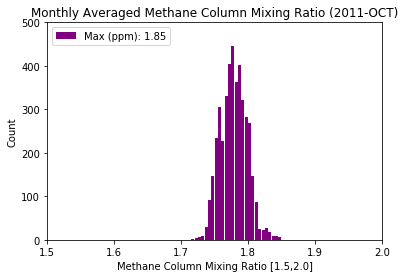

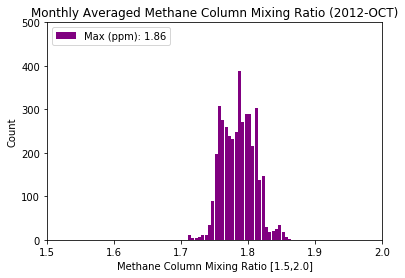

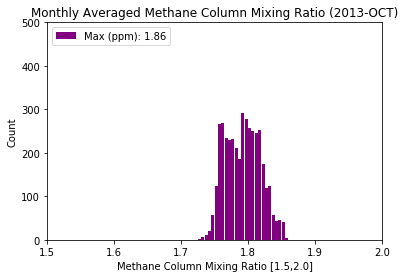

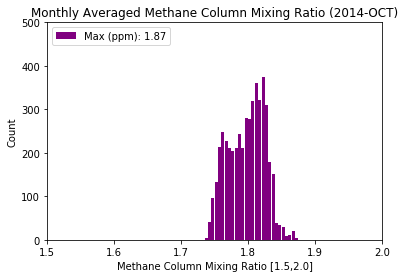

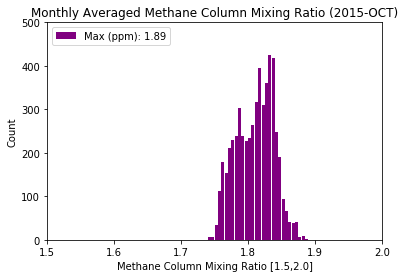

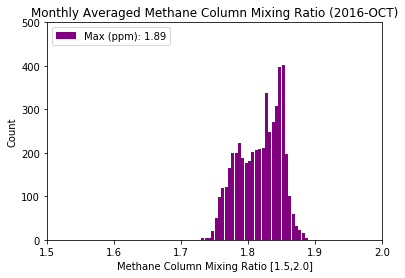

In [89]:
plt.close() # not sure if necessary

for title, datum in data10.iteritems():
    plot_hist(plt, data10[title]['flat_data'], title, x_range=(1.5, 2.0), y_max=500,color_type='purple')

In [90]:
## BAD practice to comment code. but saving for future ref

ncs.keys()
geo = ncs['15-OCT']['Data']['geolocation']
geo.variables.keys()
lat =geo.variables.get('latitude')
lon =geo.variables.get('longitude')
lat.shape

(72, 144)

### DEFINE lats and lons

In [91]:
lats = np.array(lat)
lons = np.array(lon)

In [92]:
# print mask['threshold'].value
# print mask['thresholdType'].value

In [93]:
# def get_members(node, attr):
#     print type(node)
    
    
#     if type(node) is h5py.File:
#         for k in node.get(attr).keys():
#             print k
#     elif type(node) is h5py.Group:
#         print 'group \n'
#         for k in node.get(attr):
#             print k
#     else:
#         print 'hello world'

# print get_members(f, 'Attribute')
# print get_members(f.get('Attribute'), 'metadata')
# #print get_members(f.get('Attribute'), 'intervalLengthOfLatitude')


# dir(f)
# dd = f.get('Attribute').get('metadata')

# def nrr(hdf_data):
#     return np.array(hdf_data)

# print nrr(dd['month'])
# print nrr(dd['year'])


In [94]:
# attr = f.get('Attribute')
# glat = attr.get('numLatitude')
# glon = attr.get('numLongitude')

# print nrr(glat)
# print nrr(glon)
# print attr.get('intervalLengthOfLatitude').value
# print attr.get('intevalLengthOfLongitude').value

# print attr.get('ovalParameter').values()
# print attr.get('modelParameter').values()

In [95]:
# attr = f['Attribute']
# data = f['Data']
# gg = f['Global']
# f['Attribute'].values()

In [96]:
# oct_15 = ncs['15-OCT']
# oct_15.filepath() # validation
# oct_15_ch4 = oct_15['Data']['mixingRatio']['XCH4']
# oct_15['Data']['mixingRatio']

In [97]:
# data10['15-OCT']

In [98]:
lat_bottom = 31.5
lat_top = 42.5
lon_left = -124.5
lon_right = -113.5

    
def california_map(ax=None, lllat=32.5, urlat=42.5,
                   lllon=-124.5, urlon=-113.5):
    plt.figure(figsize=(10,10))
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='h')
    m.drawstates()
    m.drawcountries()
    m.drawcoastlines(color='lightblue')
    m.drawlsmask(land_color='white', ocean_color='0.8', lakes=False)
    return m

def make_ca_map(_plt, data_month, _lons, _lats, _title_name):
    # make a map of california
    m = california_map()
    
    # generate lats and lons for the map
    x, y = m(_lons, _lats)
    
    # vmin and vmax constrain the axes
    # s is the circle size
    # alpha?
#     print np.amin(data_month)
#     print np.amax(data_month)
    m.scatter(x, y, c=data_month, s=5000, alpha=1.0, 
              vmin=1.77, vmax=1.83, 
              edgecolors='none', cmap=cm.spectral)

    c = m.colorbar(location='right')
    c.set_label("Methane Concentration (PPMV)")
    
    # add title
    _plt.xlabel('Longitude [{}, {}]'.format(lon_left, lon_right), fontsize=14)
    _plt.ylabel('Latitude [{}, {}]'.format(lat_bottom, lat_top), fontsize=14)

    _plt.title(map_title.format(_title_name), fontsize=15)
    #_plt.savefig('20{}-map-XCH4.png'.format(_title_name))
    _plt.show()
 
plt.close()


In [99]:
def get_monthly_data(_data, _name):
    # ignore mask
    return _data['masked_data']

In [100]:
# what was the purpose of this?

month_data = OrderedDict()
month_data_oct = OrderedDict()

for _month_year, data_group  in data.items():
    #print _month_year
    month_data[_month_year] = get_monthly_data(data_group, _month_year)
    
for _month_year, data_group  in data10.items():
    #print _month_year
    month_data_oct[_month_year] = get_monthly_data(data_group, _month_year)

In [101]:
month_data_feb = OrderedDict()
    
for _month_year, data_group in data2.items():
    #print _month_year
    month_data_feb[_month_year] = get_monthly_data(data_group, _month_year)

In [102]:
# print data10.keys()

In [103]:
# data.keys()

## Make Oct Maps

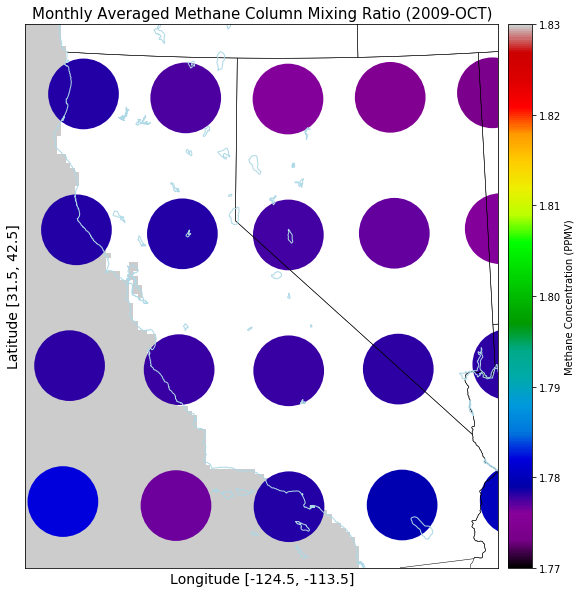

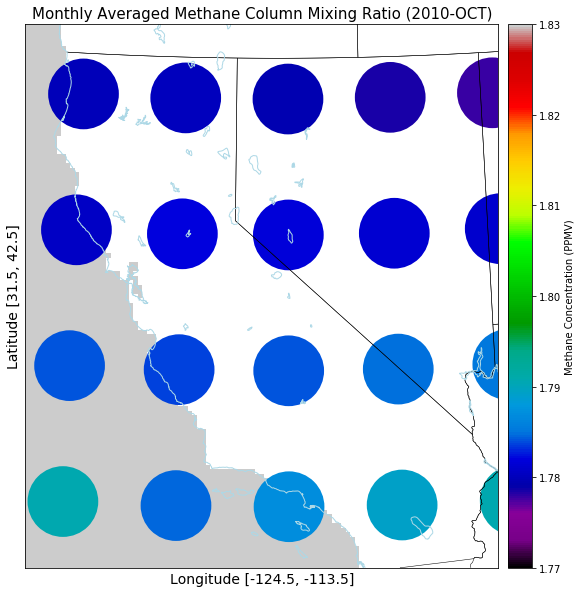

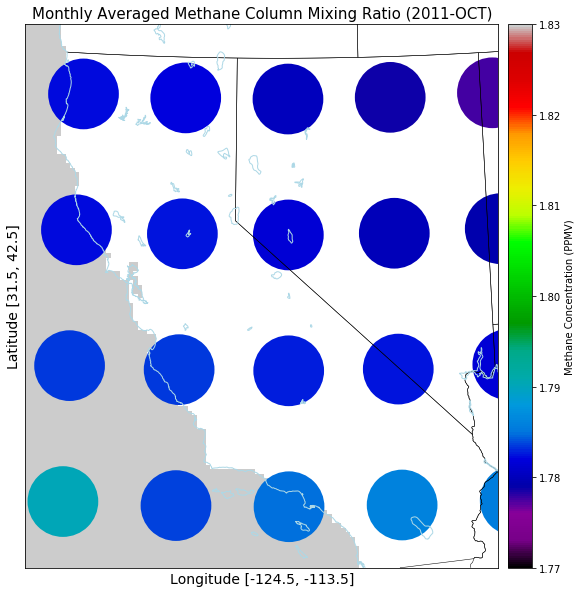

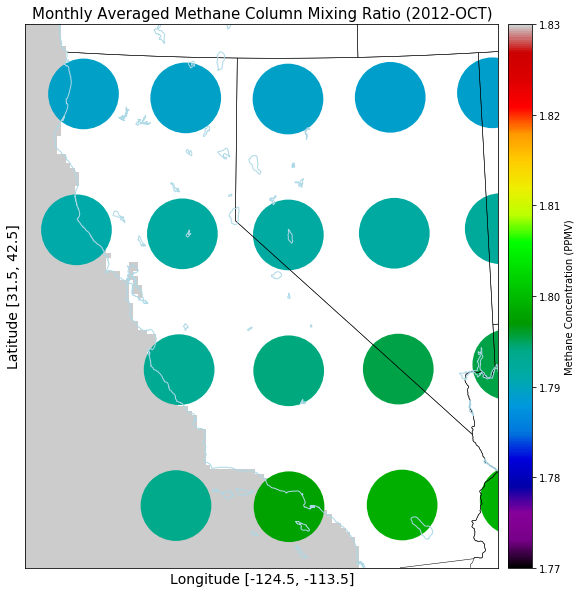

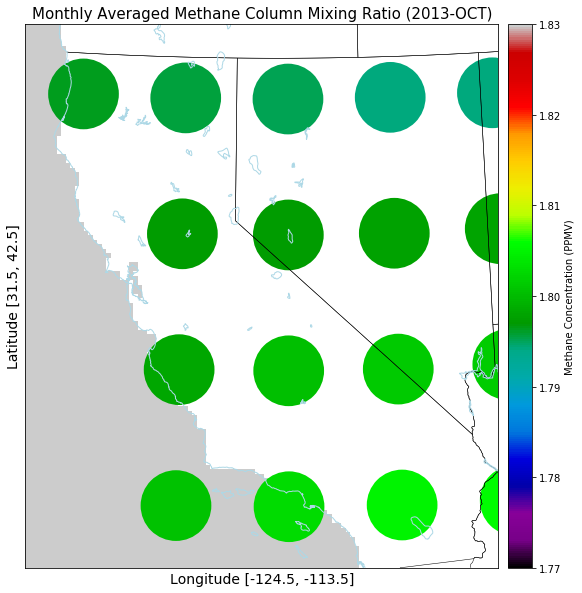

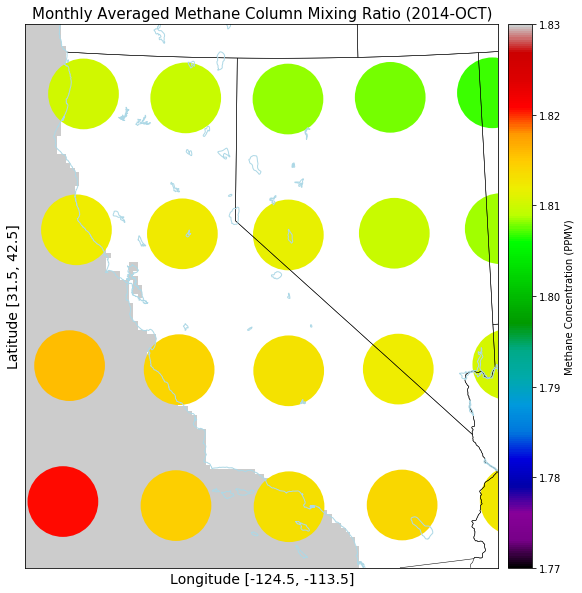

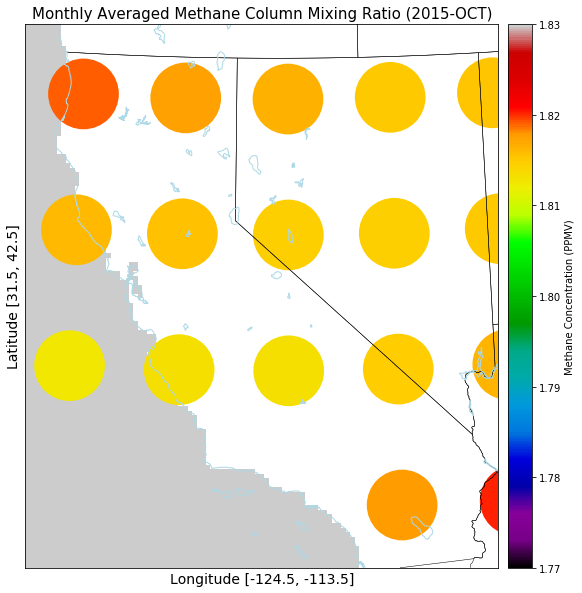

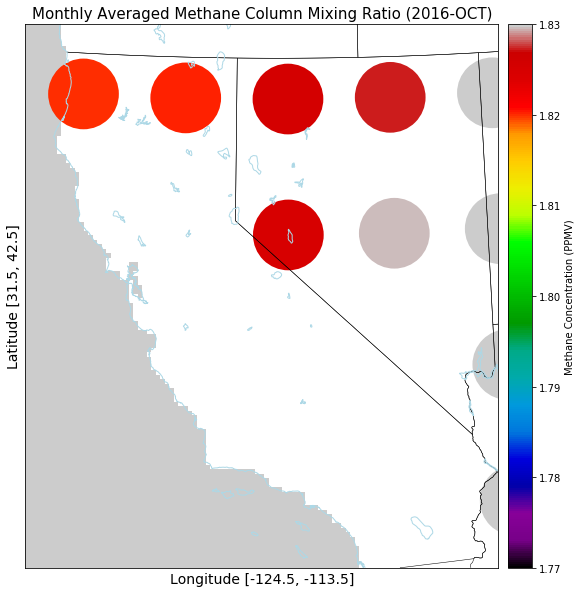

In [104]:
plt.close()
for _name, _data in month_data_oct.iteritems():
    make_ca_map(plt, _data, lons, lats, _name)

## Make Aliso Maps

In [105]:
# make_ca_map(plt, dd_oct_15, lons, lats, 'Oct 2015')

plt.close()
for _name, _data in month_data.iteritems():
    make_ca_map2(plt, _data, lons, lats, _name)

NameError: name 'make_ca_map2' is not defined

## Make February Maps (commented since figures are saved)

In [ ]:
# make_ca_map(plt, dd_oct_15, lons, lats, 'Oct 2015')

plt.close()
for _name, _data in month_data_feb.iteritems():
    make_ca_map(plt, _data, lons, lats, _name)

## US map (works, but not used, since my scope is CA)

In [ ]:
# Borrowed code to generate map of US # NOT USED my focus in CA, but this code was referenced
# to generate map of California by just specifying lat/lon

# set data
dd_oct_2015 = data10['15-OCT']['masked_data']

# Just the contingous United States
m = Basemap(
    width=5000000, 
    height=3400000, 
    projection='aea', 
    resolution='l',
    lat_1=29.5, 
    lat_2=45.5, 
    lat_0=38.5, lon_0=-96.)

# Build the figure and ax objects
fig, ax = plt.subplots()
ax.set_title('Monthly Methane Column Averaged')
x, y = m(lons, lats)

# I could not get pcolormesh working
#m.pcolormesh(lons, lats, dd_oct_15, cmap=cm.Reds, vmin=1.5, vmax=2.0, latlon=True)
#m.pcolormesh(lons, lats, dd_oct_15, latlon=True)

# scatter
m.scatter(x, y, c=dd_oct_2015, s=400, alpha=0.5, 
          vmin=1.80, vmax=1.87, 
          edgecolors='none',
          cmap=cm.spectral)
 
c = m.colorbar(location='right')
c.set_label("Methane Concentration (PPMV)")

# Built-in map boundaries
m.drawcoastlines()
m.drawlsmask(land_color='white', ocean_color='0.8', lakes=False)
m.drawcountries()
m.drawstates()

plt.show()

## World map. Not USED

In [ ]:
# # generates global map. scatter plot not showing. NOT USED
# plt.close()
# map = Basemap(projection='robin',
#               resolution='c',
#               lat_0=0,
#               lon_0=0)

# fig = plt.figure(figsize=(12,5))

# levels = np.arange(1.5, 2.0, 0.1)

# # data not showing. why?
# cntr = map.scatter(lons, lats, c=dd_oct_2015, s=500, alpha=0.5, 
#                    vmin=1.8, vmax=1.9, 
#                    edgecolors='none',
#                    cmap=cm.spectral)
# cbar = map.colorbar(cntr, location='bottom',pad='15%')

# # Add some more info to the map
# cstl = map.drawcoastlines(linewidth=.5)
# meri = map.drawmeridians(np.arange(0,360,60), linewidth=.2, labels=[1,0,0,1], labelstyle='+/-', color='grey' ) 
# para = map.drawparallels(np.arange(-90,90,30), linewidth=.2, labels=[1,0,0,1], labelstyle='+/-', color='grey')
# boun = map.drawmapboundary(linewidth=0.5, color='grey')
3# plt.show()

## LON/LATs near Aliso Canyon Oil Field

will be used to generate time series for one ~ three data points near the Aliso Canyon Oil Field

In [ ]:
#np.array(lon[:,24]) # -> -118.75 near aliso canyon lon
# np.array(lat[22,:]) #-> 33.75
# np.array(lat[23,:]) #-> 31.25